In [1]:
import pickle
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Загружаем обработанный в прошлой ЛР датасет

In [2]:
ds = pd.read_csv('../data/out.csv')

In [3]:
ds.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4472.0,106.216259,55.861038,0.850535,4642.0,75.458116,0.775312,274.486,0.745884,1.901437,1.0
1,3951.0,100.022328,52.476331,0.851320,4085.0,70.926507,0.563784,253.792,0.770834,1.906047,1.0
2,4621.0,107.515859,56.390835,0.851418,4798.0,76.704889,0.658262,277.531,0.753916,1.906619,1.0
3,4709.0,107.830578,56.550030,0.851451,4801.0,77.431809,0.824405,265.248,0.841074,1.906817,1.0
4,4581.0,106.597203,55.874881,0.851615,4685.0,76.372183,0.565625,266.221,0.812242,1.907784,1.0


In [4]:
X = ds.drop("Class", axis=1).to_numpy()
y = ds["Class"].to_numpy()

print(X.shape)
print(y.shape)

type(X)

(17863, 10)
(17863,)


numpy.ndarray

In [5]:
print(X[:5])

[[4.47200000e+03 1.06216259e+02 5.58610379e+01 8.50535305e-01
  4.64200000e+03 7.54581158e+01 7.75312067e-01 2.74486000e+02
  7.45883950e-01 1.90143727e+00]
 [3.95100000e+03 1.00022328e+02 5.24763306e+01 8.51320389e-01
  4.08500000e+03 7.09265073e+01 5.63784247e-01 2.53792000e+02
  7.70834311e-01 1.90604654e+00]
 [4.62100000e+03 1.07515859e+02 5.63908351e+01 8.51417512e-01
  4.79800000e+03 7.67048886e+01 6.58262108e-01 2.77531000e+02
  7.53915776e-01 1.90661938e+00]
 [4.70900000e+03 1.07830578e+02 5.65500303e+01 8.51451051e-01
  4.80100000e+03 7.74318088e+01 8.24404762e-01 2.65248000e+02
  8.41074214e-01 1.90681733e+00]
 [4.58100000e+03 1.06597203e+02 5.58748808e+01 8.51614663e-01
  4.68500000e+03 7.63721831e+01 5.65625386e-01 2.66221000e+02
  8.12242173e-01 1.90778399e+00]]


Разбиваю на обучающую и тестовую выборку, после чего нормализую данные

In [6]:
from sklearn.preprocessing import normalize

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.8, random_state = 1, shuffle = True)

train_X = normalize(train_X, norm="max", axis=0)
test_X = normalize(test_X, norm="max", axis=0)

print(train_X.shape)
print(train_y.shape)

print(test_X.shape)
print(test_y.shape)

(14290, 10)
(14290,)
(3573, 10)
(3573,)


In [7]:
from Net import *

In [8]:
gscv = GridSearchCV(Pipeline([('knn', kNN())]), {'knn__k' : [1, 3, 5, 7, 9]})
gscv.fit(train_X, train_y)
best(gscv)

Best params: {'knn__k': 7}
Best acc: 0.9887333799860041


Accuracy: 0.9907640638119227
Recall: 0.994982438534872
Precision: 0.9885343968095713


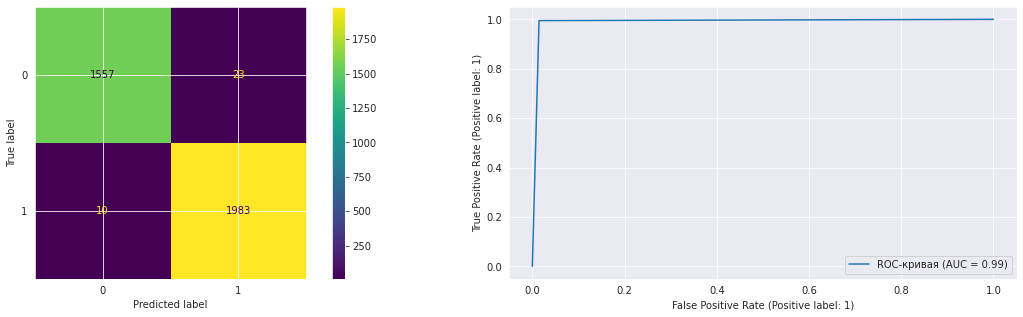

In [9]:
knn_best = gscv.best_estimator_
scores(knn_best, test_X, test_y)

In [10]:
f = open("kNN.pkl", "wb")
pickle.dump(gscv.best_estimator_, f, pickle.HIGHEST_PROTOCOL)
f.close()

[kNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) из scikit-learn

In [11]:
from sklearn.neighbors import KNeighborsClassifier

gscv = GridSearchCV(Pipeline([('knn', KNeighborsClassifier())]), {'knn__n_neighbors' : [1, 3, 5, 7, 9]})
gscv.fit(train_X, train_y)
best(gscv)

Best params: {'knn__n_neighbors': 7}
Best acc: 0.9887333799860041


Accuracy: 0.9907640638119227
Recall: 0.994982438534872
Precision: 0.9885343968095713


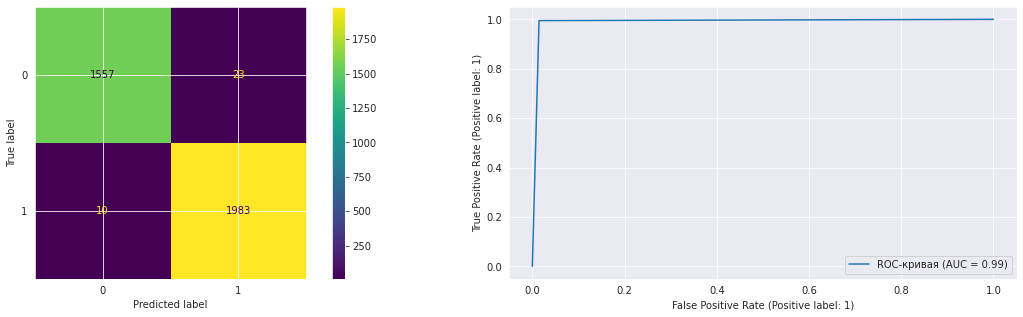

In [12]:
knn_best = gscv.best_estimator_
scores(knn_best, test_X, test_y)

In [13]:
gscv = GridSearchCV(Pipeline([("logreg", LogisticRegression(nin=train_X.shape[1]))]),
                    {"logreg__epoches" : [1, 2, 4],
                     "logreg__batch_size" : [5, 10, 20],
                     "logreg__SGD_step" : [0.01, 0.05, 0.1]})
gscv.fit(train_X, train_y)
best(gscv)

Best params: {'logreg__SGD_step': 0.1, 'logreg__batch_size': 5, 'logreg__epoches': 4}
Best acc: 0.984744576627012


Accuracy: 0.9865659109991604
Recall: 0.9979929754139488
Precision: 0.9783571077225774


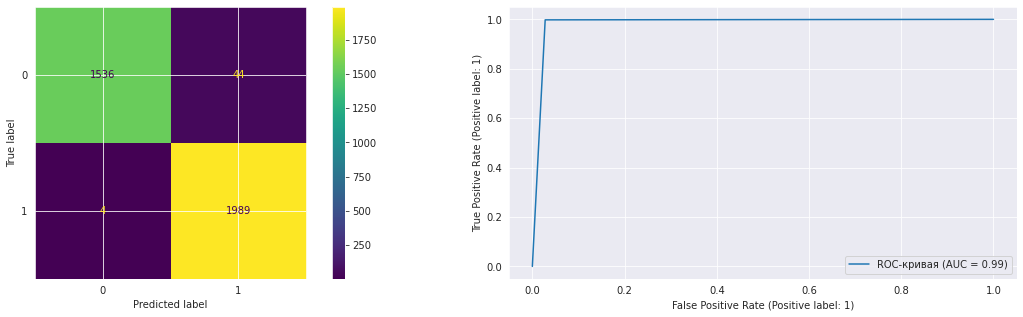

In [14]:
logreg_best = gscv.best_estimator_
scores(logreg_best, test_X, test_y)

Accuracy: 0.9865659109991604
Recall: 0.9979929754139488
Precision: 0.9783571077225774


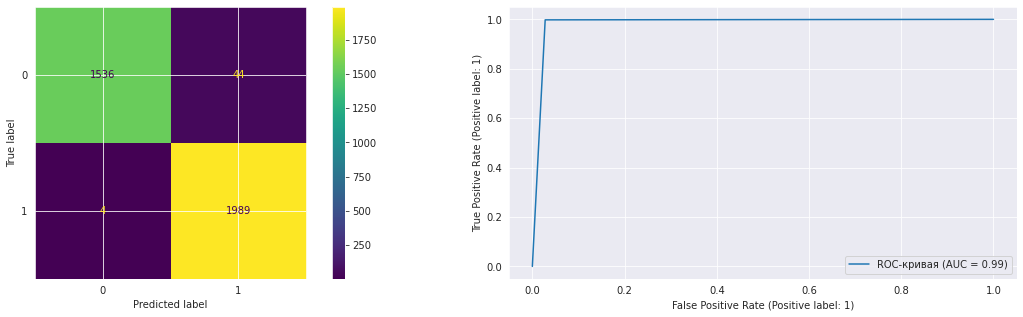

In [15]:
logreg_best = gscv.best_estimator_
scores(logreg_best, test_X, test_y)

In [16]:
rscv = RandomizedSearchCV(Pipeline([("logreg", LogisticRegression(nin=train_X.shape[1]))]),
                    {"logreg__epoches" : [1, 2, 4],
                     "logreg__batch_size" : [5, 10, 20],
                     "logreg__SGD_step" : [0.01, 0.05, 0.1]})
rscv.fit(train_X, train_y)
best(rscv)

Best params: {'logreg__epoches': 4, 'logreg__batch_size': 10, 'logreg__SGD_step': 0.1}
Best acc: 0.9832050384884534


Accuracy: 0.9857262804366079
Recall: 0.9979929754139488
Precision: 0.9769155206286837


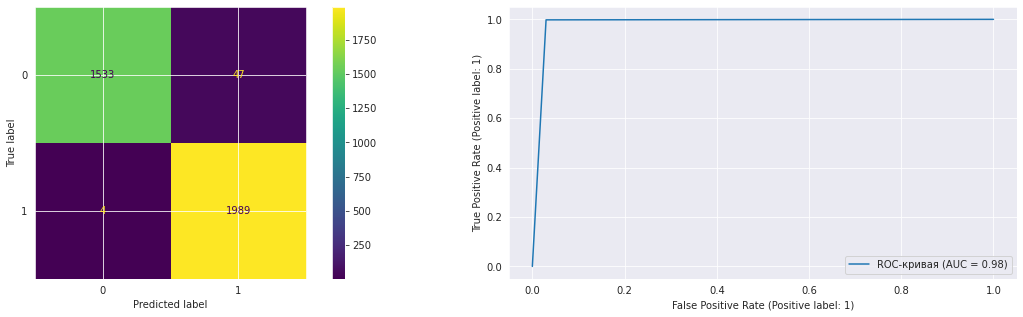

In [17]:
logreg_best = rscv.best_estimator_
scores(logreg_best, test_X, test_y)

In [18]:
f = open("logreg.pkl", "wb")
pickle.dump(logreg_best, f, pickle.HIGHEST_PROTOCOL)
f.close()

[Логистическая регрессия](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) из scikit-learn

In [19]:
from sklearn.linear_model import LogisticRegression

gscv = GridSearchCV(Pipeline([("logreg", LogisticRegression())]),
                    {"logreg__penalty" : ["l2", "none"],
                     "logreg__solver" : ["newton-cg", "lbfgs"],
                     "logreg__max_iter" : [1000, 10000]})
gscv.fit(train_X, train_y)
best(gscv)

Best params: {'logreg__max_iter': 1000, 'logreg__penalty': 'none', 'logreg__solver': 'newton-cg'}
Best acc: 0.9898530440867738


Accuracy: 0.890848026868178
Recall: 1.0
Precision: 0.8363407469576164


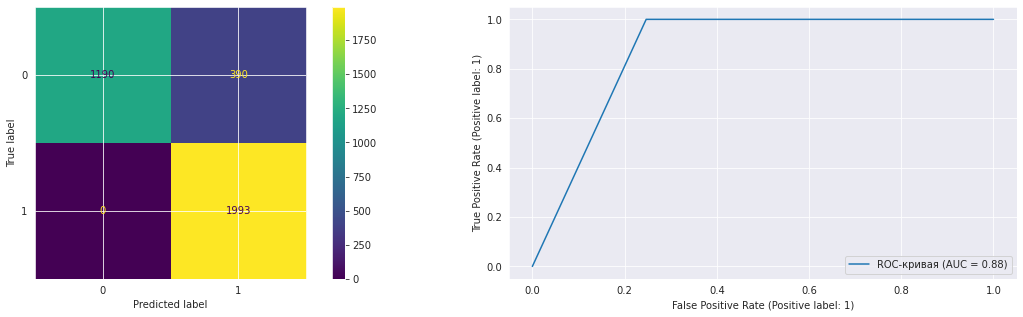

In [20]:
logreg_best = gscv.best_estimator_
scores(logreg_best, test_X, test_y)

In [21]:
gscv = GridSearchCV(Pipeline([("SVM", SVM(nin=train_X.shape[1]))]),
                    {"SVM__epoches" : [1, 2, 4],
                     "SVM__batch_size" : [5, 10, 20],
                     "SVM__SGD_step" : [0.01, 0.05, 0.1],
                     "SVM__alpha" : [1.0, 0.1, 0.01, 0.0]})
gscv.fit(train_X, train_y)
best(gscv)

Best params: {'SVM__SGD_step': 0.01, 'SVM__alpha': 0.01, 'SVM__batch_size': 20, 'SVM__epoches': 2}
Best acc: 0.9810356892932119


Accuracy: 0.980688497061293
Recall: 0.9989964877069744
Precision: 0.967444120505345


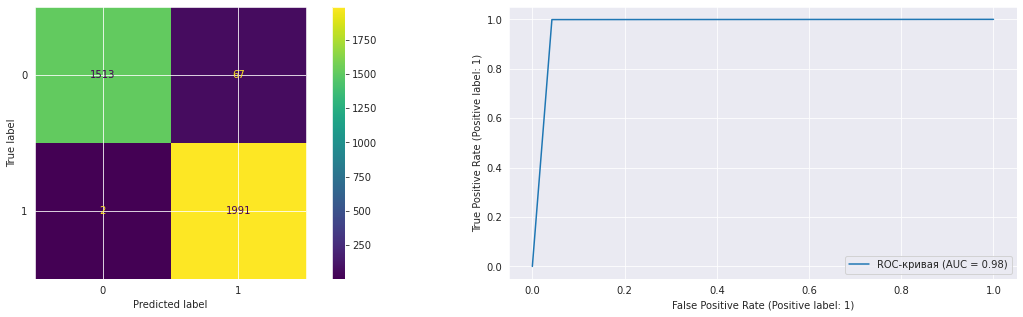

In [22]:
SVM_best = gscv.best_estimator_
scores(SVM_best, test_X, test_y)

Функция для отрисовки разделяющей прямой

In [23]:
def drawDataAndLine(W, b, X, y):
    n = X.shape[1]
    fig, ax = plt.subplots(n, n)
    for i in range(n):
        for j in range(n):
            ax[i][j].set_xlim(0.0, 1.0)
            ax[i][j].set_ylim(0.0, 1.0)
            if i==j:
                continue
            x_list0 = []
            y_list0 = []

            x_list1 = []
            y_list1 = []
            for (ii, elem) in enumerate(X):
                if (y[ii] == 1):
                    x_list1.append(elem[i])
                    y_list1.append(elem[j])
                elif (y[ii] == 0):
                    x_list0.append(elem[i])
                    y_list0.append(elem[j])
            ax[i][j].scatter(x_list1, y_list1, s = 10)
            ax[i][j].scatter(x_list0, y_list0, s = 10)

            line_x = np.linspace(0.0, 1.0, 100)
            line_y = -(W[i] * line_x + b) / W[j]
            ax[i][j].plot(line_x, line_y, "-r")
    fig.set_size_inches(fig.get_size_inches() * n)
    plt.tight_layout()
    plt.show()

In [24]:
f = open("SVM.pkl", "wb")
pickle.dump(SVM_best, f, pickle.HIGHEST_PROTOCOL)
f.close()

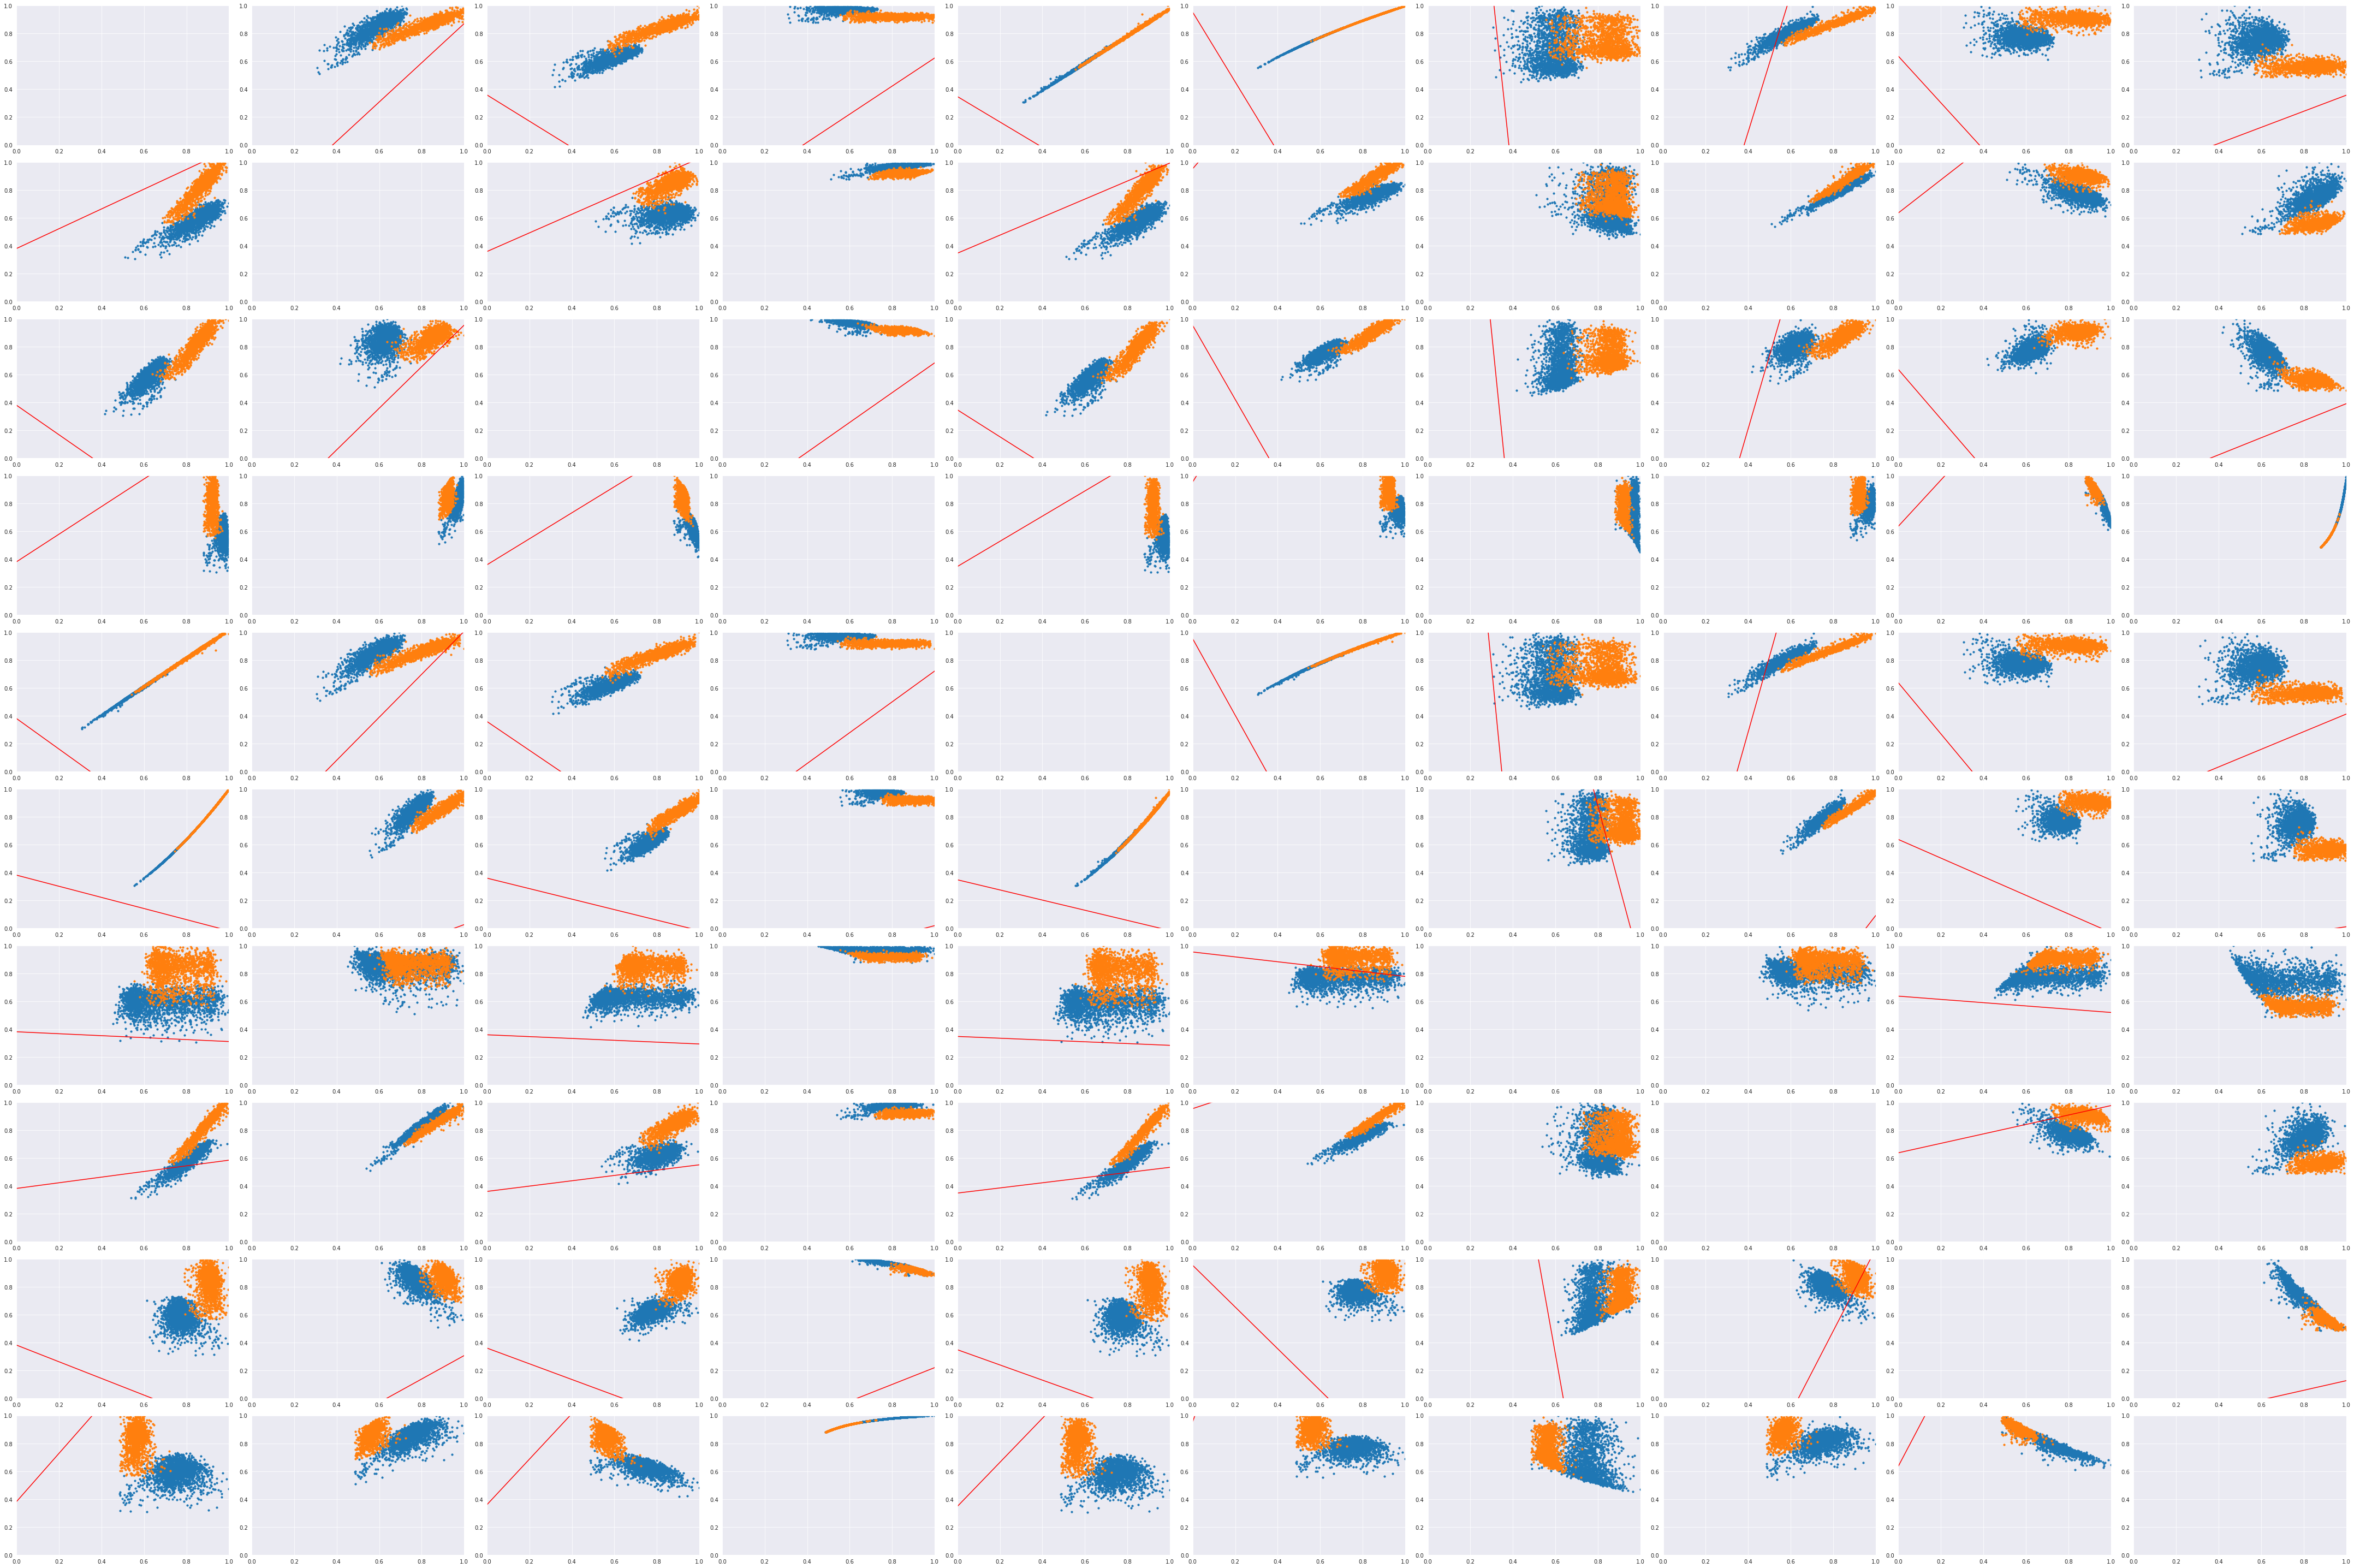

In [25]:
SVM_params = SVM_best[0].getW()
drawDataAndLine(SVM_params[0][:10], SVM_params[0][-1], test_X, test_y)

In [26]:
rscv = RandomizedSearchCV(Pipeline([("SVM", SVM(nin=train_X.shape[1]))]),
                    {"SVM__epoches" : [1, 2, 4],
                     "SVM__batch_size" : [5, 10, 20],
                     "SVM__SGD_step" : [0.01, 0.05, 0.1],
                     "SVM__alpha" : [1.0, 0.1, 0.01, 0.0]})
rscv.fit(train_X, train_y)
best(rscv)

Best params: {'SVM__epoches': 2, 'SVM__batch_size': 20, 'SVM__alpha': 0.0, 'SVM__SGD_step': 0.01}
Best acc: 0.9766969909027292


Accuracy: 0.9829275118947663
Recall: 0.9984947315604616
Precision: 0.9716796875


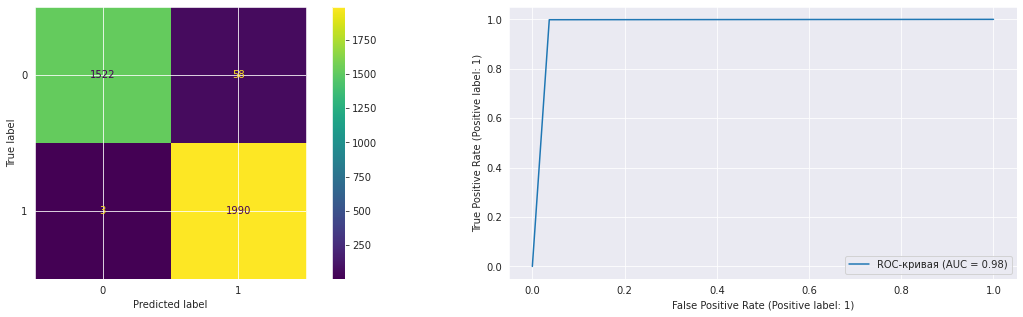

In [27]:
SVM_best = rscv.best_estimator_
scores(SVM_best, test_X, test_y)

[SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) из scikit-learn

In [28]:
from sklearn.svm import LinearSVC

gscv = GridSearchCV(Pipeline([("svc", LinearSVC())]),
                    {"svc__loss" : ["hinge", "squared_hinge"],
                     "svc__max_iter" : [1e5, 1e6]})
gscv.fit(train_X, train_y)
best(gscv)

Best params: {'svc__loss': 'squared_hinge', 'svc__max_iter': 100000.0}
Best acc: 0.987893631910427


Accuracy: 0.9888049258326337
Recall: 0.9954841946813848
Precision: 0.9846153846153847


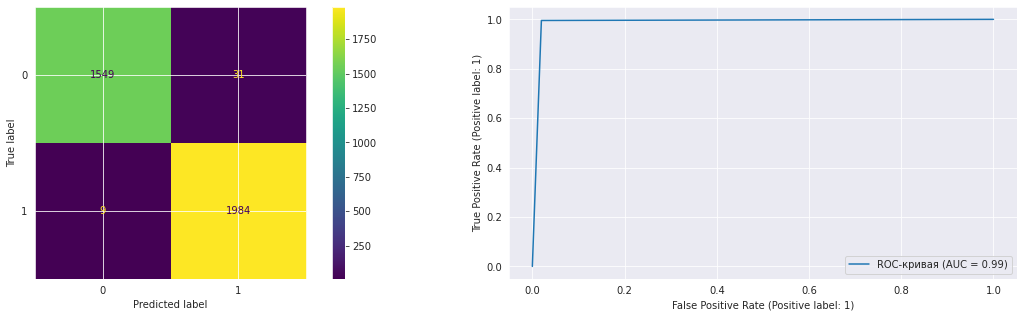

In [29]:
SVM_best = gscv.best_estimator_
scores(SVM_best, test_X, test_y)

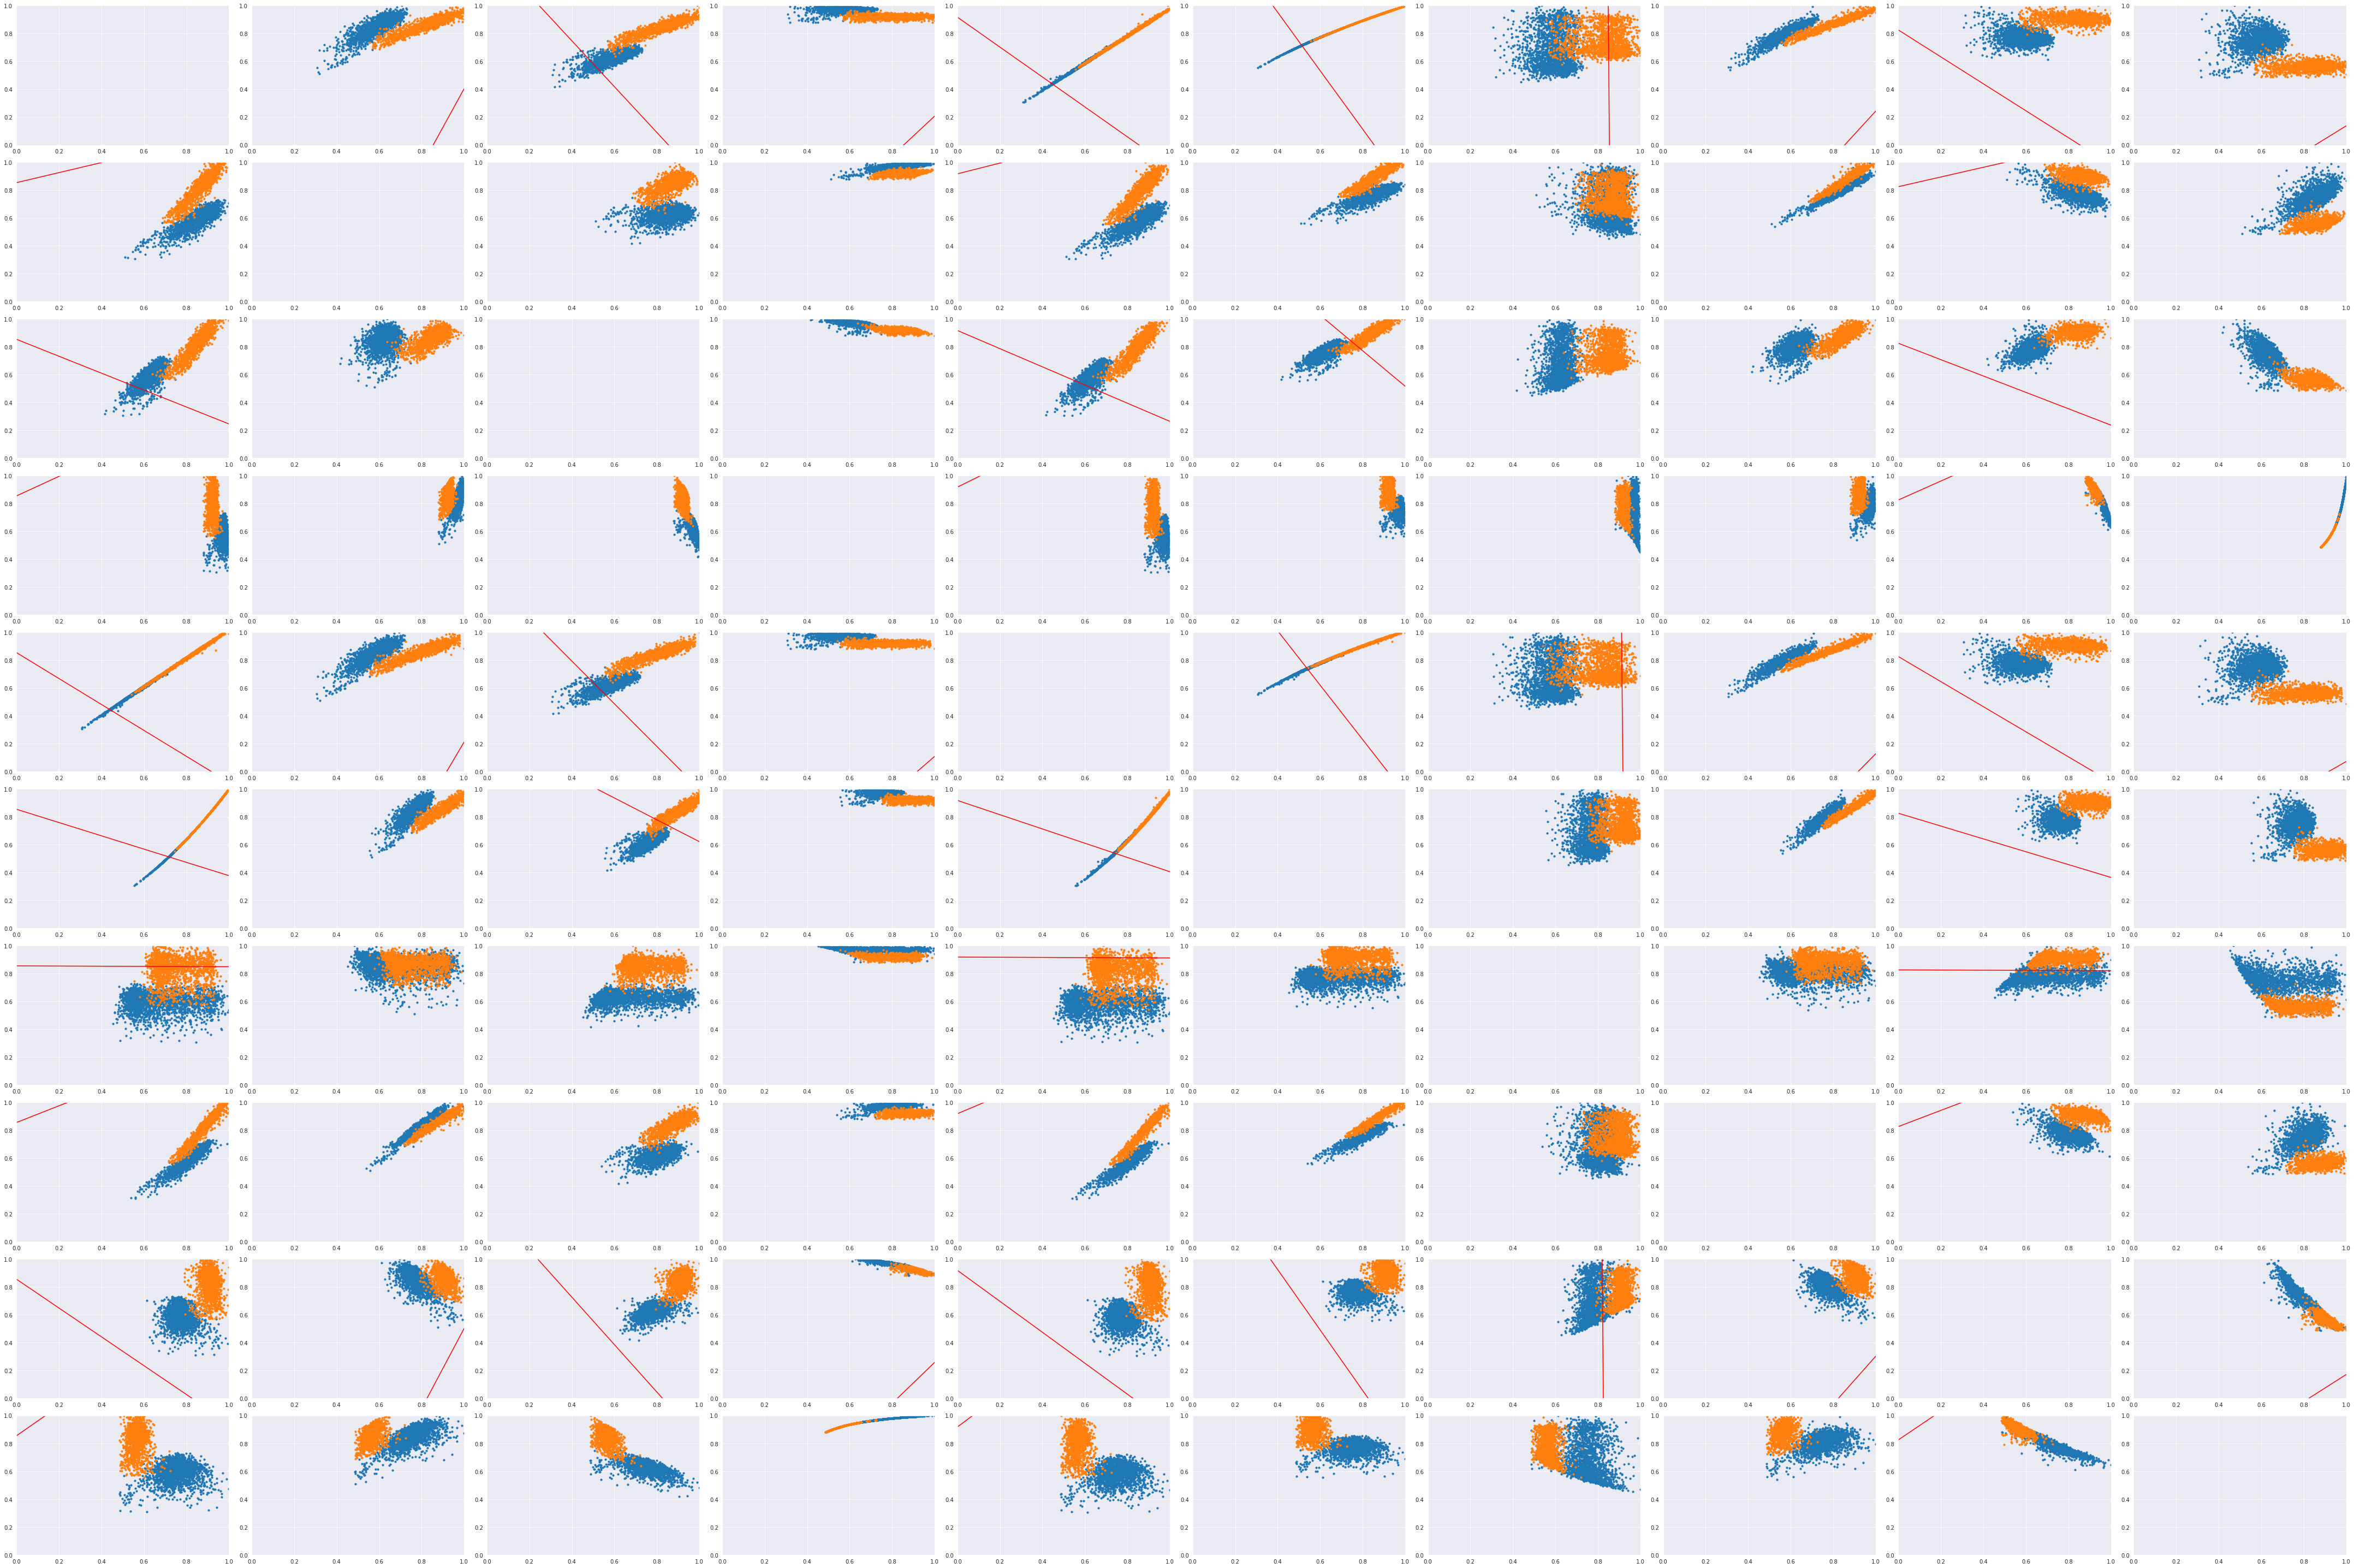

In [30]:
drawDataAndLine(SVM_best[0].coef_[0], SVM_best[0].intercept_[0], test_X, test_y)

Accuracy: 0.9860061572907921
Recall: 0.9959859508278976
Precision: 0.9792797237296498


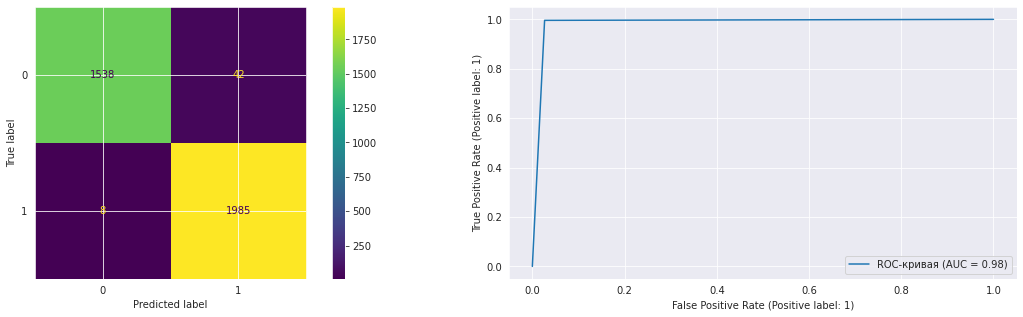

In [31]:
NB = Pipeline([("NB", NaiveBayes())])
NB.fit(train_X, train_y)
scores(NB, test_X, test_y)

In [32]:
f = open("NB.pkl", "wb")
pickle.dump(NB, f, pickle.HIGHEST_PROTOCOL)
f.close()

[Наивный байесовский классификатор](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) из scikit.learn

Accuracy: 0.9851665267282396
Recall: 0.9984947315604616
Precision: 0.9754901960784313


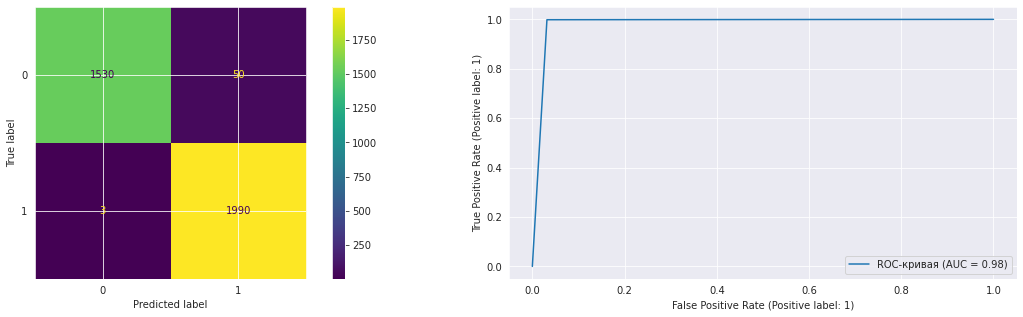

In [33]:
from sklearn.naive_bayes import GaussianNB

NB = Pipeline([("NB", GaussianNB())])
NB.fit(train_X, train_y)
scores(NB, test_X, test_y)